**Assignment notes -**
1. You may use any visualization tool - seaborn/matplotlib for a task
2. Sample outputs are provided but your output may vary based on choice of library and parameters.
3. Use the mandatory parameter values wherever specified

## Import pandas, numpy, matplotlib.pyplot, seaborn

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Fetch and read data
In this assignment, we will be working with a dataset of property listings from airbnb - https://raw.githubusercontent.com/iamsharduld/DSC207Datasets/main/Week5/airbnb_sd_listings.csv. As you may have noticed, the file type is csv - comma separated values. **Read this data into a pandas dataframe `listings`.** [0.5pt]

In [ ]:
listings_df = pd.read_csv("https://raw.githubusercontent.com/iamsharduld/DSC207Datasets/main/Week5/airbnb_sd_listings.csv")

### 1. Inspect Data

1.1 **Print the shape** of the listings_df DataFrame. [0.5pt]

In [ ]:
listings_df.shape

(10301, 18)

1.2 **Display the first 10 entries** in the listings_df DataFrame to get an idea of what the columns are and what some values might look like. [0.5pt]

In [ ]:
listings_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78481,-117.25313,Entire home/apt,2050,3,0,NaN,NaN,3,156,0,NaN
1,29967,"Great home, 10 min walk to Beach",129123,Michael,NaN,Pacific Beach,32.80751,-117.25760,Entire home/apt,234,4,72,2021-12-16,0.52,5,246,10,NaN
2,38245,Point Loma: Den downstairs,164137,Melinda,NaN,Roseville,32.74217,-117.21931,Private room,74,1,146,2021-08-15,1.06,3,347,3,NaN
3,54001,"La Jolla Garden Cottage: Blks to Ocn; 2Bdms, 1...",252692,Marsha,NaN,La Jolla,32.81301,-117.26856,Entire home/apt,258,5,280,2021-11-26,2.10,2,34,37,NaN
4,62274,"charming, colorful, close to beach",302986,Isabel,NaN,Pacific Beach,32.80583,-117.24244,Entire home/apt,80,1,689,2021-12-05,5.12,2,322,68,NaN
5,62949,Pacific Beach Cozy Private Hideaway Bikes Incl...,21532,Lisa,NaN,Pacific Beach,32.80885,-117.23043,Entire home/apt,91,1,821,2021-12-13,7.23,2,68,107,NaN
6,67441,Canyon apartment hideaway,332552,Peter,NaN,College Area,32.76347,-117.07753,Entire home/apt,70,30,6,2021-11-04,0.08,6,287,3,NaN
7,75668,San Diego Living by JA 2,401936,Johnathon,NaN,North Hills,32.74699,-117.14243,Private room,45,2,195,2020-09-30,1.54,2,200,0,NaN
8,77785,"1 bdrm, shared space Ideal-Short Term Work Assign",417659,Alicia,NaN,Old Town,32.74827,-117.19059,Private room,75,32,17,2020-10-16,0.36,1,81,0,NaN
9,79300,San Diego living by JA 1,401936,Johnathon,NaN,North Hills,32.74715,-117.14280,Private room,50,2,159,2021-09-27,1.21,2,154,4,NaN


1.3 **Find number of unique hosts** in the dataset [0.5pt]

In [ ]:
len(listings_df['host_id'].unique())

4754

Find the number of listings that offer only shared rooms. [0.5pt]

In [ ]:
len(listings_df[listings_df['room_type'] == "Shared room"])

73

Describe the dataset (Recall describe( ) function from Week 3) [0.5pt]

In [ ]:
listings_df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.030100e+04,1.030100e+04,0.0,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,8789.000000,10301.000000,10301.000000,10301.000000,0.0
mean,3.388817e+07,1.201453e+08,NaN,32.767907,-117.185308,289.983108,6.594700,53.898845,2.000727,17.885545,188.304242,16.369187,NaN
std,1.634643e+07,1.256373e+08,NaN,0.063158,0.065041,382.561957,22.009448,84.874213,1.859501,37.414924,124.081456,21.312226,NaN
min,5.570000e+03,3.264000e+03,NaN,32.532487,-117.281710,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.014710e+07,2.171336e+07,NaN,32.727343,-117.250200,110.000000,1.000000,3.000000,0.530000,1.000000,76.000000,1.000000,NaN
50%,3.790845e+07,7.037592e+07,NaN,32.760670,-117.176900,176.000000,2.000000,18.000000,1.450000,3.000000,178.000000,7.000000,NaN
75%,4.916832e+07,1.837519e+08,NaN,32.796780,-117.144510,336.000000,3.000000,67.000000,2.990000,14.000000,313.000000,25.000000,NaN
max,5.390857e+07,4.362920e+08,NaN,33.101790,-116.929021,10000.000000,999.000000,869.000000,13.030000,202.000000,365.000000,188.000000,NaN


### 2. Plotting Data (With Matplotlib)

#### 2.1 Plot histogram of AirBnB prices in San Diego.  [1pt]

1.   This histogram should have price ranges on the x-axis and counts on the y-axis. 
2.   Choose an appropriate color and edge-color combination.
3.   Choose an appropriate value for bin
4.   Provide axis labels
5.   Provide a chart title/caption

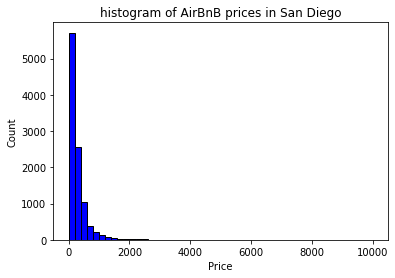

Text(0, 0.5, 'Count')

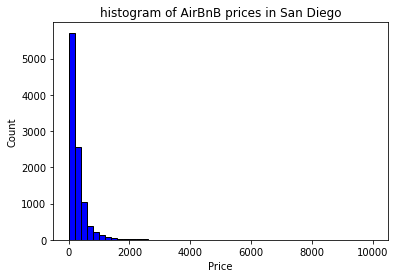

In [ ]:
plt.hist(listings_df['price'], color = 'blue', edgecolor = 'black', bins = 50)
plt.title('histogram of AirBnB prices in San Diego')
plt.xlabel('Price')
plt.ylabel('Count')

**What insight does this visualization provide? How does the value of bin change the visualization (you may try a low and high value of bin and discuss the pros and cons of both).** [0.5pt]

Answer : It tells us that most of the airbnbs are below the cost of 1000$, however there are some that are also in the range of 10000. The choice of bin gives granularity of the price ranges, very small is less informational, very large is difficult to read.

#### 2.2 Create a scatterplot of `price` on X-Axis vs `number_of_reviews` on Y-Axis for first 1000 values in the dataset. [1pt]
1.   Provide axis labels
2.   Provide a chart title/caption

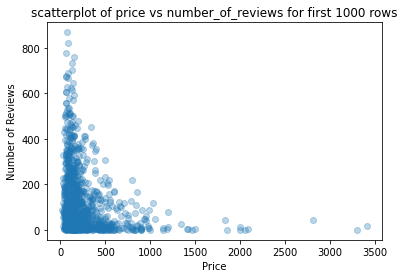

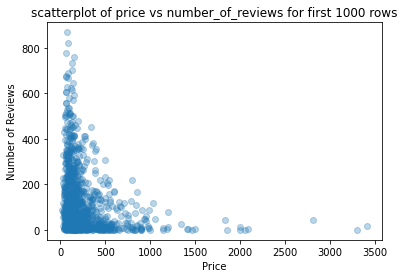

In [ ]:
plt.scatter(listings_df['price'].head(1000), listings_df['number_of_reviews'].head(1000), alpha=0.3)
plt.title('scatterplot of price vs number_of_reviews for first 1000 rows')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

**What is the trend you observe from the above visualization? Do you think it makes sense from a real world perspective?** [0.5pt]

Answer: We observe that the number of reviews decreases with increase in price of the airbnb. This makes sense as the volume of people choosing high budget hotels is lesser, whereas cheaper hotels would have more number of people and hence more reviews.

#### 2.3 Bar graphs
Bar graphs are useful in plotting data for categorical variables like room_type.

2.3.1 Find the exact count for each room type (Recall value_counts( ) from week 3) and use it to create a horizontal bar chart. [1 pt]
1. Provide axis labels
2. Provide a chart title/caption

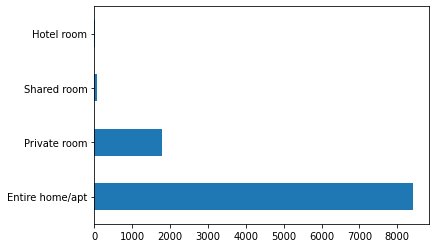

In [ ]:
listings_df['room_type'].value_counts()

Entire home/apt    8424
Private room       1795
Shared room          73
Hotel room            9
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room Type Count')

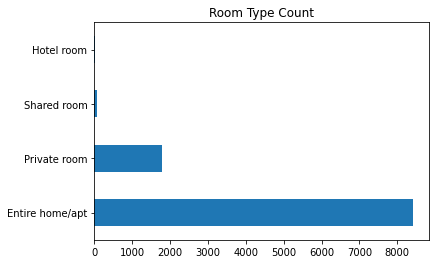

In [ ]:
listings_df['room_type'].value_counts().plot(kind = 'barh')
plt.title('Room Type Count')

### 3. Subplots 

Subplots allow us to have several graphs in one view which may help us analyse quickly and efficiently. Our goal is to create 2 subplots to understand trends by neighbourhood in San Diego. Let us start by setting up our subplots.



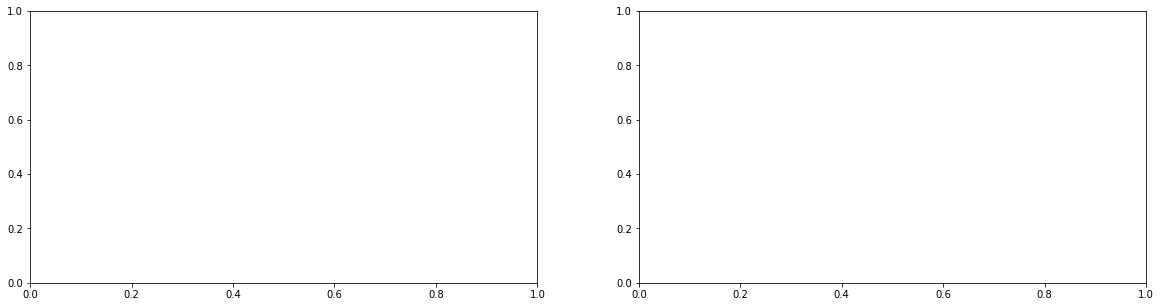

In [ ]:
#Run this cell
fig, axes = plt.subplots(1, 2, figsize=(20, 5))


1. For the first of 2 subplots, Plot top 10 neighbourhoods in San Diego with most number of AirBnB units available. Hence this would be a bar graph with neighbourhood and counts. This may require 2 steps -

  1. Extracting the df for `top_10_neighbourhoods`. (Recall value_counts() and slicing from Week 3) [0.5pt]

  2. Plot the graph [1pt]
    1.   Provide axis labels
    2.   Provide a chart title/caption
    3.   Set the ax parameter to axes[0] to set it to the first subplot
    4.   If done correctly, we should see a graph with a non-increasing count of airbnb by neighbourhoods. 

    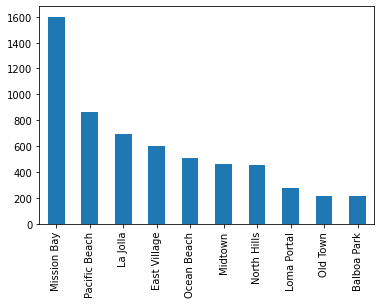



In [ ]:
top_10_neighbourhoods = listings_df['neighbourhood'].value_counts()[:10]
top_10_neighbourhoods

Mission Bay      1601
Pacific Beach     864
La Jolla          697
East Village      599
Ocean Beach       511
Midtown           461
North Hills       450
Loma Portal       273
Old Town          214
Balboa Park       213
Name: neighbourhood, dtype: int64

In [ ]:
top_10_neighbourhoods.index

Index(['Mission Bay', 'Pacific Beach', 'La Jolla', 'East Village',
       'Ocean Beach', 'Midtown', 'North Hills', 'Loma Portal', 'Old Town',
       'Balboa Park'],
      dtype='object')

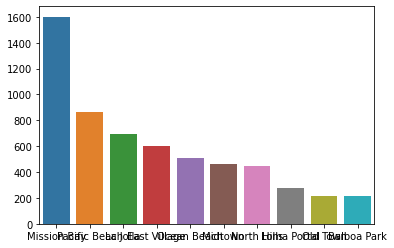

In [ ]:
sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values)

In [ ]:
top_10_neighbourhoods.plot(kind = 'bar', ax=axes[0])

Text(0.5, 1.0, 'Counts of Listings by Neighbourhood')

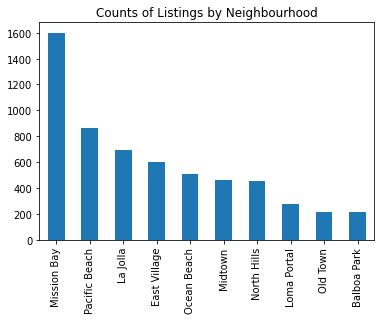

In [ ]:
top_10_neighbourhoods.plot(kind = 'bar')
plt.title('Counts of Listings by Neighbourhood')

2. For the second subplot, we want to find a distribution of prices of airbnbs in the `top_10_neighbourhoods`. To perform this you may consider 2 steps -

  1. Creating a `filtered_df` that has all the data for only the `top_10_neighbourhoods`. Hint - the isin() method may be useful here. [0.5pt]

  2. Plot boxplot with x-axis as neighbourhood and y-axis as price. [1pt]
      1.   Provide axis labels
      2.   Provide a chart title/caption
      3.   Set the ax parameter to axes[1] to set it to the second subplot
      4.   Set parameters `showfliers = False` to get a cleaner graph by removing the outliers.

      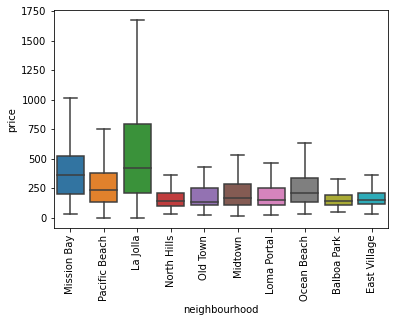

In [ ]:
type(top_10_neighbourhoods)

pandas.core.series.Series

In [ ]:
top_10_neighbourhoods_list = list(top_10_neighbourhoods.index)
filtered_df = listings_df[listings_df['neighbourhood'].isin(top_10_neighbourhoods_list)]
filtered_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.784810,-117.253130,Entire home/apt,2050,3,0,NaN,NaN,3,156,0,NaN
1,29967,"Great home, 10 min walk to Beach",129123,Michael,NaN,Pacific Beach,32.807510,-117.257600,Entire home/apt,234,4,72,2021-12-16,0.52,5,246,10,NaN
3,54001,"La Jolla Garden Cottage: Blks to Ocn; 2Bdms, 1...",252692,Marsha,NaN,La Jolla,32.813010,-117.268560,Entire home/apt,258,5,280,2021-11-26,2.10,2,34,37,NaN
4,62274,"charming, colorful, close to beach",302986,Isabel,NaN,Pacific Beach,32.805830,-117.242440,Entire home/apt,80,1,689,2021-12-05,5.12,2,322,68,NaN
5,62949,Pacific Beach Cozy Private Hideaway Bikes Incl...,21532,Lisa,NaN,Pacific Beach,32.808850,-117.230430,Entire home/apt,91,1,821,2021-12-13,7.23,2,68,107,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10270,53847066,GOATHOTE | COZY 2/1 APT W/ BALCONY | SAN DIEGO,433993744,Goathote California,NaN,Midtown,32.731404,-117.168097,Entire home/apt,139,1,0,NaN,NaN,4,343,0,NaN
10279,53864387,lovers view 1 bedroom,16019956,Vima,NaN,East Village,32.710710,-117.154240,Entire home/apt,326,1,0,NaN,NaN,1,4,0,NaN
10285,53877093,Dazzling Hillcrest 1bed Studio!,8336938,Vacation Rentals By Aaron,NaN,North Hills,32.744669,-117.143608,Entire home/apt,88,7,0,NaN,NaN,46,324,0,NaN
10298,53903862,Walkable PB Condo Garnet Free Parking Fast Wifi!,336396789,Surfseekers,NaN,Pacific Beach,32.803373,-117.231871,Entire home/apt,259,1,0,NaN,NaN,9,362,0,NaN


[Text(0.0, 0, 'Mission Bay'),
 Text(0.2, 0, 'Pacific Beach'),
 Text(0.4, 0, 'La Jolla'),
 Text(0.6000000000000001, 0, 'North Hills'),
 Text(0.8, 0, 'Old Town'),
 Text(1.0, 0, 'Midtown'),
 Text(0, 0, 'Loma Portal'),
 Text(0, 0, 'Ocean Beach'),
 Text(0, 0, 'Balboa Park'),
 Text(0, 0, 'East Village')]

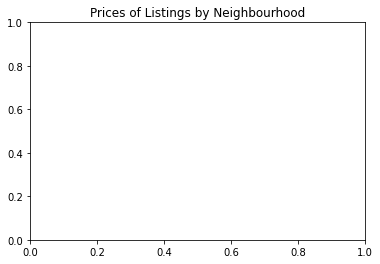

In [ ]:
ax=sns.boxplot(data=filtered_df, x="neighbourhood" ,y="price", showfliers = False, ax=axes[1])
plt.title('Prices of Listings by Neighbourhood')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

3.3 **Print the combined subplot by printing `fig`.**

In [ ]:
axes[0].set_title("Happy")

Text(0.5, 1.0, 'Happy')

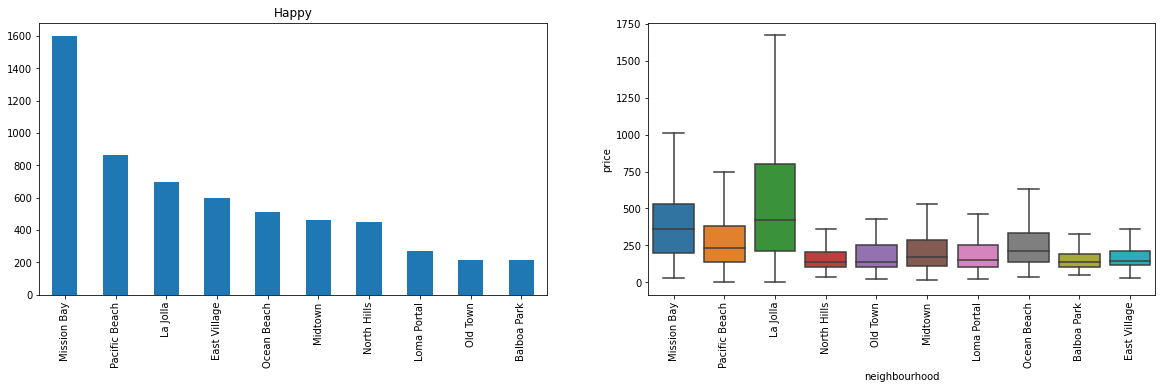

In [ ]:
fig

### 6. Overlay longitude and lattitude with color as price gradient on San Diego Map Using Plotly [No points].

Run this cell to see an advanced usage of plotly to generate a geographical map. 
Use data for 10 most popular neighbourhoods found in 3.1

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(filtered_df, color=filtered_df['price'], lat="latitude", lon="longitude",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
                        
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()